In [4]:
import sys
sys.path.append('/home/sb95/ChromatinDynamics')
from topology import TopologyGenerator
from ChromatinDynamics import ChromatinDynamics
import openmm.unit as unit
import numpy as np


In [5]:

generator = TopologyGenerator()
generator.gen_top([1000])


In [6]:
Rg = [] 
positions=[]
num_blocks = 5
name='saw_LJ'
for idx, xx in enumerate([1.0, 0.5]):
    Rg.append([])
    for replica in range(1):
        sim = ChromatinDynamics(generator.topology, integrator='langevin', platform_name="OpenCL", output_dir=f"{name}_{replica}", log_file=f"chrom_dynamics_{replica}.log")
        sim.system_setup(mode=name, chi=0.0, r_rep=xx)
        sim.simulation_setup()
        sim.run(10000) #relax
        for _ in range(num_blocks):
            sim.run(2000)
            sim.print_force_info()
            state = sim.simulation.context.getState(getPositions=True)
            pos = state.getPositions(asNumpy=True).value_in_unit(unit.nanometers)
            positions.append(pos)
            Rg[idx].append(sim.analyzer.compute_RG())
# np.savetxt("./Radius_of_gyration.txt", Rg)
for val in Rg:
    print(np.mean(val), np.std(val))

2025-03-27 12:25:44,105 | INFO | ChromatinDynamics | ************************************************************
2025-03-27 12:25:44,106 | INFO | ChromatinDynamics |                      Chromatin Dynamics                     
2025-03-27 12:25:44,106 | INFO | ChromatinDynamics | ************************************************************
2025-03-27 12:25:44,107 | WARNING | platforms | Requested platform 'OpenCL' not found. Available platforms: Reference, CPU. Defaulting to first available platform.
2025-03-27 12:25:44,108 | INFO | platforms | ------------------------------------------------------------
2025-03-27 12:25:44,108 | INFO | integrators | IntegratorManager initialized
2025-03-27 12:25:44,109 | INFO | integrators | Valid integrators: ['brownian', 'langevin', 'active']
2025-03-27 12:25:44,110 | INFO | integrators | ------------------------------------------------------------
2025-03-27 12:25:44,111 | INFO | ChromatinDynamics | Setting up system with mode='saw_LJ'
2025-03-27 1

21.947325299530554 0.3264913767212485
20.85178186061294 0.39128997113413383


In [7]:
pos = np.array(positions)
pos.shape

(10, 1000, 3)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


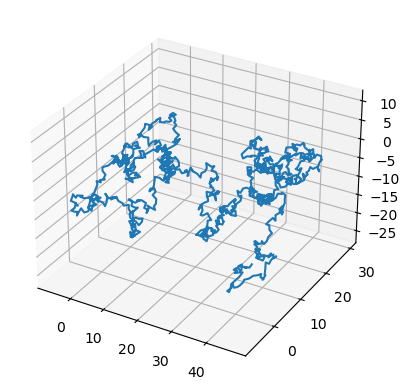

In [13]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n=9
ax.plot(pos[n,:,0], pos[n,:,1], pos[n,:,2])

In [9]:
for atom in generator.topology.atoms():
    print(atom.element)

A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A


In [ ]:
from utilities import Run

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_pos_3Drandom_walk(num_steps, step_size):
    # Generate random directions on the unit sphere
    directions = np.random.normal(size=(num_steps, 3))
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]  # Normalize
    steps = directions * step_size  # Scale to step size
    positions = np.cumsum(steps, axis=0)  # Cumulative sum for path
    return positions  # Shape: (num_steps, 3)

import numpy as np

def self_avoiding_walk_3d(num_steps, step_size, max_retries=1000):
    """
    Generate a 3D self-avoiding walk of given step size.
    Ensures that no two positions are closer than `step_size`.
    """
    positions = [np.zeros(3)]  # start at origin

    for step in range(1, num_steps):
        success = False
        for _ in range(max_retries):
            # Propose a random direction
            direction = np.random.normal(size=3)
            direction /= np.linalg.norm(direction)
            candidate = positions[-1] + step_size * direction

            # Check distance to all previous positions
            dists = np.linalg.norm(np.array(positions) - candidate, axis=1)
            if np.all(dists >= step_size):
                positions.append(candidate)
                success = True
                break

        if not success:
            print(f"Step {step}: Stuck after {max_retries} attempts. Ending walk.")
            break  # Exit early if stuck

    return np.array(positions)

In [6]:
Rg=[]
for N in [100, 1000, 5000, 10000]:
    pos = self_avoiding_walk_3d(N, 1.0)
    center=np.mean(pos,axis=0)
    Rg.append(np.linalg.norm(np.mean((pos-center)**2, axis=0)))

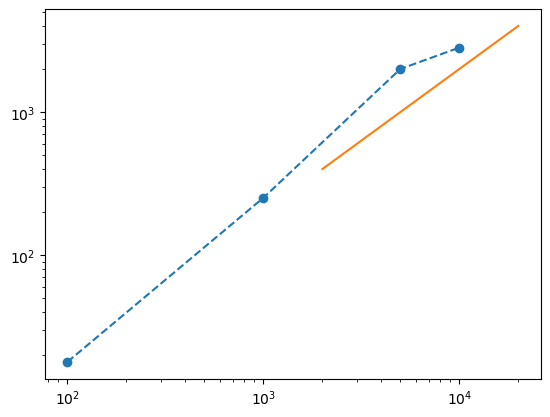

In [9]:
plt.loglog([100, 1000, 5000, 10000], Rg,'o--')
plt.loglog([2000,20000], 0.2*np.array([2000,20000])**(1))